## Setup

In [ ]:
from enum import Enum
class COLUMN_TYPES(Enum):
    NUMERICAL = 'numerical',
    CATEGORICAL = 'categorical'

## Config

In [ ]:
FILE_PATH = '../atus/ehresp_2014.xlsx'
SELECTED_COLUMNS = COLUMN_TYPES.CATEGORICAL

## Load dataset
- Separate the dataset into categorical, numerical, and target DataFrames.
    - Having the categorical columns isolated will faciliate performing One Hot Encoding, whereas numerical columns do not need this manner of transformation.
    - However, since `erbmi` is our target column, we will omit it from either of these DataFrames. Instead, we'll create a separate `dataset_target` DataFrame, which we'll then merge with either the `dataset_categorical` or `dataset_numerical`. 

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
import timeit

In [ ]:
# Load the ehresp_2014 DataFrame
ehresp_2014 = pd.read_excel(FILE_PATH)

categorical_columns = ['eeincome1', \
                       'erhhch', \
                       'erincome', \
                       'erspemch', \
                       'ethgt', \
                       'etwgt', \
                       'eudietsoda', \
                       'eudrink', \
                       'eueat', \
                       'euexercise', \
                       'eufastfd', \
                       'euffyday', \
                       'eufdsit', \
                       'eusnap', \
                       'eugenhth', \
                       'eugroshp', \
                       'euinclvl', \
                       'euincome2', \
                       'eumeat', \
                       'eumilk', \
                       'euprpmel', \
                       'eusoda', \
                       'eustores', \
                       'eustreason', \
                       'eutherm', \
                       'euwic']

# Excluding `erbmi` because we're using this to determine our target
numerical_columns = ['ertpreat', \
                     'ertseat', \
                     'euexfreq', \
                     'eufastfdfrq', \
                     'euhgt', \
                     'euwgt']

target_column = ['erbmi']

dataset_numerical = ehresp_2014[numerical_columns]
dataset_categorical = ehresp_2014[categorical_columns]
dataset_target = ehresp_2014[target_column]

## Select categorical or numerical data and merge with target
- Select whether we want to work with categorical or numerical data.
- Merge our chosen dataset (either cateogircal or numerical) with our target column, relying on the indices of each dataframe to perform the merge.
    - [Pandas DataFrame Merge](https://stackoverflow.com/a/36539295)

In [ ]:
# Choose which dataset we want to work with
if (SELECTED_COLUMNS == COLUMN_TYPES.CATEGORICAL):
    dataset = dataset_categorical.copy()
elif (SELECTED_COLUMNS == COLUMN_TYPES.NUMERICAL):
    dataset = dataset_numerical.copy()

# Merge our chosen dataset with the target column
dataset = dataset.merge(dataset_target, \
                        how='outer', \
                        left_index=True,
                        right_index=True \
                       )

## Get X & y and Train & Test
- Switch from DataFrames to matrices
- Pull out our predictors and target
- Calculate target classes
- Split and normalize data

In [ ]:
# Get our X and y
column_count = dataset.shape[1]
X = dataset.iloc[:, 0:column_count-1].values
y = dataset.iloc[:, -1].values

In [ ]:
# One Hot Encode categorical data
if (SELECTED_COLUMNS == COLUMN_TYPES.CATEGORICAL):
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

    # Apply LabelEncoder to multiple columns: https://stackoverflow.com/a/31939145
    X = pd.DataFrame(X).apply(LabelEncoder().fit_transform).values

    # OHE for multiple columns using pd.get_dummies: https://stackoverflow.com/a/44601764
    # Another get_dummies example: http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
    # OHE vs. get_dummies: https://medium.com/@guaisang/handling-categorical-features-get-dummies-onehotencoder-and-multicollinearity-f9d473a40417
    X_df = pd.DataFrame(X, columns=categorical_columns)
    X_dummies = pd.get_dummies(X_df, columns=categorical_columns)
    X = X_dummies.values
    
    # TODO: Determine if there are extraneous 
    # dummy columns we want to drop after this.
        

In [ ]:
# Prepare our target
# Define a function to return BMI class
def get_bmi_class(bmi):
    if bmi < 18.5:
        return "Excellent"
    elif bmi >= 18.5 and  bmi < 24.9:
        return "Normal Weight"
    elif bmi >= 24.9 and bmi < 29.9:
        return "Overweight"
    elif bmi > 30:
        return "Obese"
    else:
        return "Unknown"

In [ ]:
# Convert `y` from a continuous to a categorical value
y = np.asarray(pd.Series(get_bmi_class(bmi) for bmi in y))

In [ ]:
# Split the data into a training and a testing set
from sklearn.model_selection import train_test_split
X_train, X_test, \
y_train, y_test = train_test_split(X, \
                                   y, \
                                   test_size=0.3, \
                                   random_state=0)


In [ ]:
# Normalize numerical data
if (SELECTED_COLUMNS == COLUMN_TYPES.NUMERICAL):
    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

In [ ]:
# Examine the shape of the X & y Train & Test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# Examine our training set
pd.DataFrame(X_train).head()

# SVM

In [ ]:
# Linear kernel
from sklearn.svm import SVC
classifierObj = SVC(kernel='linear', degree=a, gamma='auto')
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

print(accuracy_score(y_test, y_pred))

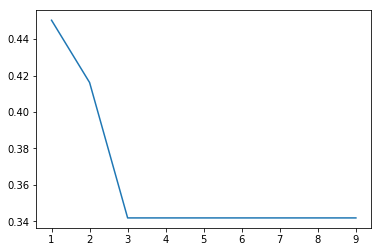

In [23]:
# Poly kernel 
degree = np.arange(1,10) 
scores = []
for a in degree:
    classifierObj = SVC(kernel='poly', degree=a, gamma='auto')
    classifierObj.fit(X_train, y_train)

    #Making predictions on the Test Set
    y_pred = classifierObj.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(degree, scores)
plt.show()

In [ ]:
# rbf kernel
degree = np.arange(1,10) 
scores = []
for a in degree:
    classifierObj = SVC(kernel='rbf', degree=a, gamma='auto')
    classifierObj.fit(X_train, y_train)

    #Making predictions on the Test Set
    y_pred = classifierObj.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(degree, scores)
plt.show()

In [ ]:
# sigmoid kernel
degree = np.arange(1,10) 
scores = []
for a in degree:
    classifierObj = SVC(kernel='sigmoid', degree=a, gamma='auto')
    classifierObj.fit(X_train, y_train)

    #Making predictions on the Test Set
    y_pred = classifierObj.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(degree, scores)
plt.show()

# Kernel SVM

In [ ]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.svm import SVC
classifierObj = SVC(gamma="auto")
classifierObj.fit(X_train, y_train)

In [ ]:
#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

In [ ]:
#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)

In [ ]:
#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

In [ ]:
#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

# KNN

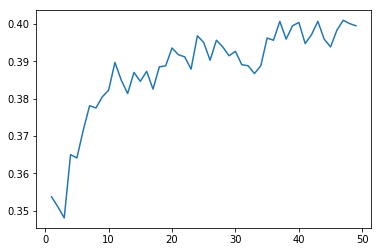

In [26]:
from sklearn.neighbors import KNeighborsClassifier
k = np.arange(1,50)
scores = []
for a in k:
    classifierObj = KNeighborsClassifier(n_neighbors=a, p=2, metric='minkowski')
    classifierObj.fit(X_train, y_train)

    #Making predictions on the Test Set
    y_pred = classifierObj.predict(X_test)

    b = accuracy_score(y_test, y_pred)
    scores.append(b)
    
plt.plot(k, scores)
plt.show()

# Random Forest Classifier

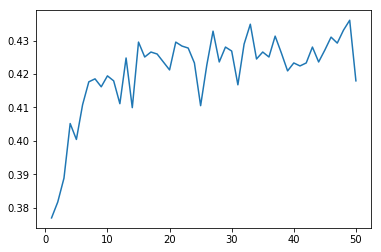

In [27]:
from sklearn.ensemble import RandomForestClassifier

estimators = np.arange(1,51)
scores = []
for a in estimators:
    classifierObj = RandomForestClassifier(n_estimators=a, criterion='gini')
    classifierObj.fit(X_train,y_train)

    #Making predictions on the Test Set
    y_pred = classifierObj.predict(X_test)

    b = accuracy_score(y_test, y_pred)
    scores.append(b)
    
plt.plot(estimators, scores)
plt.show()